# Olympics Data Analysis

####  Data Preparation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Summer-Olympic-medals.csv',encoding='latin-1')

In [8]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [10]:
df.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

#### Data Cleaning

In [12]:
print(df.isnull().sum())

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [13]:
df_cleaned = df.dropna()

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [15]:
print(df_cleaned.isnull().sum())

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64


#### Exploratory Data Analysis (EDA)

C:\Users\fasal\AppData\Local\Temp\ipykernel_3660\3998799914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medal_counts.values, y=medal_counts.index, palette='viridis')


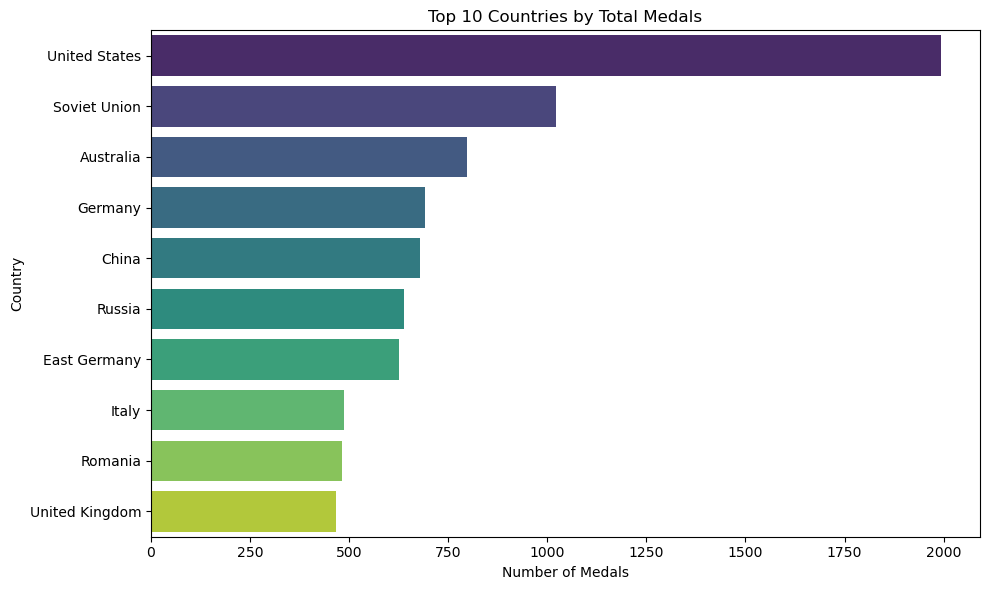

In [17]:
# Load your DataFrame here (assuming it's called df)
df = df.dropna(subset=['Medal', 'Country'])  # Remove rows without medal info
medal_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=medal_counts.values, y=medal_counts.index, palette='viridis')
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


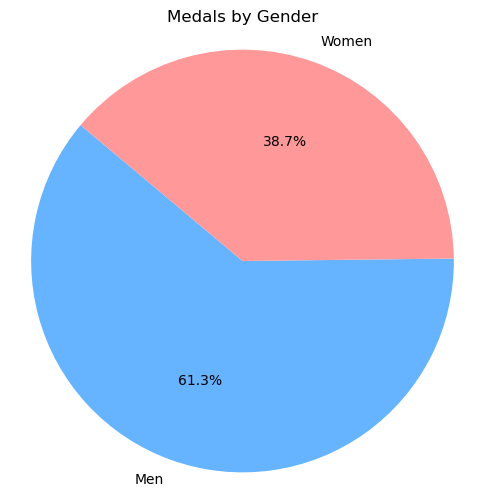

In [18]:
# Medal Distribution by Gender
gender_medal_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_medal_counts, labels=gender_medal_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Medals by Gender')
plt.axis('equal')
plt.show()


C:\Users\fasal\AppData\Local\Temp\ipykernel_3660\3741963947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_athletes.values, y=top_athletes.index, palette='cubehelix')


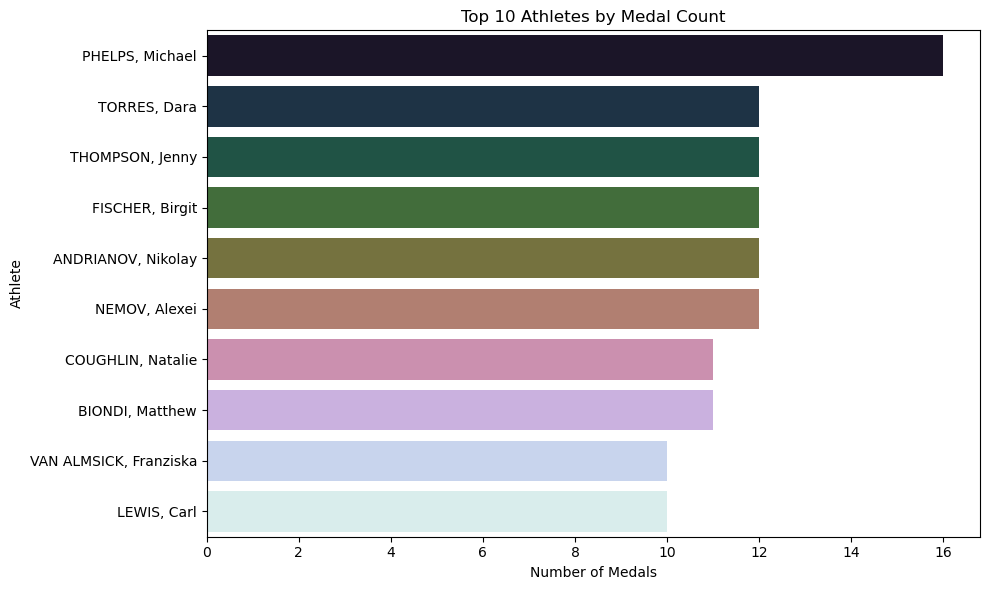

In [19]:
# Top 10 Most Successful Athletes
top_athletes = df['Athlete'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_athletes.values, y=top_athletes.index, palette='cubehelix')
plt.title('Top 10 Athletes by Medal Count')
plt.xlabel('Number of Medals')
plt.ylabel('Athlete')
plt.tight_layout()
plt.show()

In [20]:
df.to_csv("cleaned_dataset")